## Building the Model

In [1]:
import numpy as np
import pandas as pd
import sklearn.linear_model
import sklearn.ensemble
import sklearn.preprocessing
from utils.analysis_utils import *

%matplotlib
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

Using matplotlib backend: Qt5Agg


In [2]:
data = pd.read_csv("final_main_table.csv")

### First Attempt: Logistic Regression

The first run we made used logistic regression, and only the similarity features.

Let's see how far that got us:

In [3]:
features = ["topic_sim", "entities_sim", "categories_sim"]
for feature in features:
    data[feature] = sklearn.preprocessing.scale(data[feature])
    
# Splitting to train (80%) and test (20%) sets
train_data, test_data = split_to_test_and_train(data)

train_features_list = [train_data[feature] for feature in features]
test_features_list = [test_data[feature] for feature in features]

# Extracting X and y vectors for train and test
train_points, train_labels = prepare_dataset_for_model(train_features_list, train_data.clicked)
test_points, test_labels = prepare_dataset_for_model(test_features_list, test_data.clicked)

model = sklearn.linear_model.LogisticRegression(verbose=True)
model.fit(train_points, train_labels)

display_probs = model.predict_proba(test_points)[:, 1]
test_data["probability_of_click"] = display_probs  # Error generated at this line can be ignored

# Evaluating the model using 0/1 loss
zero_one_accuracy = accuracy_zero_one_loss(test_data)
print("0/1 Accuracy for Logistic Regression Model: " + str(zero_one_accuracy))

# Evaluating the model using MAP@12 metric
map12_accuracy = MAP12_Accuracy(test_data)
print("MAP@12 Accuracy for Logistic Regression Model: " + str(map12_accuracy))


[LibLinear]

C:\Users\Dean\Anaconda3\lib\site-packages\ipykernel\__main__.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


0/1 Accuracy for Logistic Regression Algorithm: 0.262509725042
Now calculating MAP@12 accuracy, should take about 5 minutes
MAP@12 Accuracy for Logistic Regression Algorithm: 0.503027275956


This was obviously far from good, as even simple single-feature models could acheive much better results. At this point we came to the realisation we needed a lot more features - so we spent a sizeable amount of time thinking about and generating all the features mentioned above.

We then wanted to check whether logistic regression's performance has improved, and also check whether there are better models we can use. A lot of other teams used gradient boosting and random forests, so we decided to check them as well and compare them to logistic regression. 

C:\Users\Dean\Anaconda3\lib\site-packages\sklearn\utils\validation.py:420: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Dean\Anaconda3\lib\site-packages\sklearn\utils\validation.py:420: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Dean\Anaconda3\lib\site-packages\sklearn\utils\validation.py:420: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)


Now checking Logistic Regression
[LibLinear]

C:\Users\Dean\Anaconda3\lib\site-packages\ipykernel\__main__.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Now calculating MAP@12 accuracy, should take about 5 minutes
Now checking Gradient Boosting
      Iter       Train Loss   Remaining Time 
         1           0.9551            8.91m
         2           0.9339            8.85m
         3           0.9168            8.75m
         4           0.9030            8.72m
         5           0.8911            8.61m
         6           0.8812            8.53m
         7           0.8729            8.43m
         8           0.8658            8.37m
         9           0.8601            8.25m
        10           0.8548            8.17m
        20           0.8292            7.14m
        30           0.8209            6.25m
        40           0.8180            5.36m
        50           0.8162            4.60m
        60           0.8152            3.66m
        70           0.8146            2.70m
        80           0.8142            1.78m
        90           0.8139           52.74s
       100           0.8137            0.00s
Now cal

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:  2.2min finished
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    3.9s finished
C:\Users\Dean\Anaconda3\lib\site-packages\ipykernel\__main__.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Now calculating MAP@12 accuracy, should take about 5 minutes


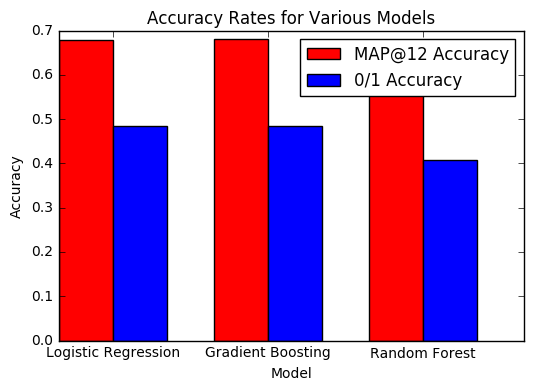

In [4]:
features = ["topic_sim", "entities_sim", "categories_sim",
            "is_morning", "is_noon", "is_afternoon", "is_evening", "is_night",
            "is_weekend", "platform_is_mobile", "platform_is_desktop", "platform_is_tablet",
            "clicks_appearances_ratio", "ad_count_per_display", "ads_per_advertiser",
            "ads_per_campaign"]

features_to_scale = ["topic_sim", "entities_sim", "categories_sim",
                     "clicks_appearances_ratio", "ad_count_per_display",
                     "ads_per_advertiser", "ads_per_campaign"]

for feature in features_to_scale:
    data[feature] = sklearn.preprocessing.scale(data[feature])
    
train_features_list = [train_data[feature] for feature in features]
test_features_list = [test_data[feature] for feature in features]

# Extracting X and y vectors for train and test
train_points, train_labels = prepare_dataset_for_model(train_features_list, train_data.clicked)
test_points, test_labels = prepare_dataset_for_model(test_features_list, test_data.clicked)
    
models = [sklearn.linear_model.LogisticRegression(verbose=True),
         sklearn.ensemble.GradientBoostingClassifier(verbose=True),
         sklearn.ensemble.RandomForestClassifier(verbose=True)]

model_names = ["Logistic Regression", "Gradient Boosting", "Random Forest"]

map_12_accuracies = np.zeros(shape=3)
zero_one_accuracies = np.zeros(shape=3)

for i in range(len(models)):
    model = models[i]
    print("Now checking " + model_names[i])
    model.fit(train_points, train_labels)
    display_probs = model.predict_proba(test_points)[:, 1]
    test_data["probability_of_click"] = display_probs  # Error generated at this line can be ignored
    zero_one_accuracies[i] = accuracy_zero_one_loss(test_data)
    map_12_accuracies[i] = MAP12_Accuracy(test_data)
    

fig = plt.figure()
plt.bar(range(3), map_12_accuracies, 0.35, color='r', label="MAP@12 Accuracy")
plt.bar(np.array(range(3)) + 0.35, zero_one_accuracies, 0.35, color='b', label="0/1 Accuracy")
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Accuracy Rates for Various Models')
plt.xticks(np.array(range(3)) + 0.35, ("Logistic Regression", "Gradient Boosting", "Random Forest"))
plt.legend()
plt.tight_layout()
plt.show()
    
acc_frame = pd.DataFrame()
acc_frame["Model"] = model_names
acc_frame["MAP@12 Accuracy"] = map_12_accuracies
acc_frame["0/1 Accuracy"] = zero_one_accuracies

print(acc_frame)


    
    



In [10]:
sklearn.ensemble

<module 'sklearn.ensemble' from 'C:\\Users\\Dean\\Anaconda3\\lib\\site-packages\\sklearn\\ensemble\\__init__.py'>